In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('default')
from matplotlib.patches import Rectangle
import seaborn as sns
import pingouin as pg

mpl.rcParams['figure.dpi']= 300
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [5]:
behaviour = pd.read_feather('/Users/Oliver/Google Drive/hippnac/data/final_submission/ChR.feather')
behaviour

,Time,Lap,Position,Velocity,Pump,Licking,Opto,MotionEnergy_Mouth,onset_opto,onset_time,onset_opto_time,onset_opto_epoch,Mouse,Sex,ExpID,Group,Trial
0,0.0070,1,200.285511,2.942537,False,-0.374091,0.0,-1.997467,0.0,-6.0,-4.0,NaN,38,m,199,ChR2,opto1
1,0.0203,1,200.495246,2.958407,False,-0.374091,0.0,0.825164,0.0,-6.0,-4.0,NaN,38,m,199,ChR2,opto1
2,0.0336,1,200.708166,2.977717,True,-0.374091,0.0,0.243978,0.0,-6.0,-4.0,NaN,38,m,199,ChR2,opto1
3,0.0469,1,200.924953,3.001513,True,-0.374091,0.0,0.559089,0.0,-6.0,-4.0,NaN,38,m,199,ChR2,opto1
4,0.0602,1,201.141058,3.030380,False,-0.374091,0.0,-0.386962,0.0,-6.0,-4.0,NaN,38,m,199,ChR2,opto1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262846,898.6223,8,84.822137,NaN,False,-0.436622,0.0,NaN,0.0,NaN,NaN,7.0,44,f,274,EYFP,optolearning2
3262847,898.6323,8,84.855894,NaN,False,-0.436643,0.0,NaN,0.0,NaN,NaN,7.0,44,f,274,EYFP,optolearning2
3262848,898.6423,8,84.892666,NaN,False,-0.436649,0.0,NaN,0.0,NaN,NaN,7.0,44,f,274,EYFP,optolearning2
3262849,898.6523,8,84.932150,NaN,False,-0.436650,0.0,NaN,0.0,NaN,NaN,7.0,44,f,274,EYFP,optolearning2


In [6]:
opto_trials = list(range(199, 206))+list(range(209, 213))+[220, 227, 234, 242, 247, 248, 249, 251, 252, 254, 255]
behaviour.Opto = behaviour.Opto.astype(float)
opto_time_each = behaviour.groupby(['onset_opto_time', 'onset_opto_epoch', 'ExpID', 'Sex', 'Mouse', 'Group', 'Trial']).mean().reset_index()
opto_time_each = opto_time_each.loc[(opto_time_each.onset_opto_time>-30)&(opto_time_each.onset_opto_time<50)&(
    opto_time_each.ExpID.isin(opto_trials))]


# Fig 2E

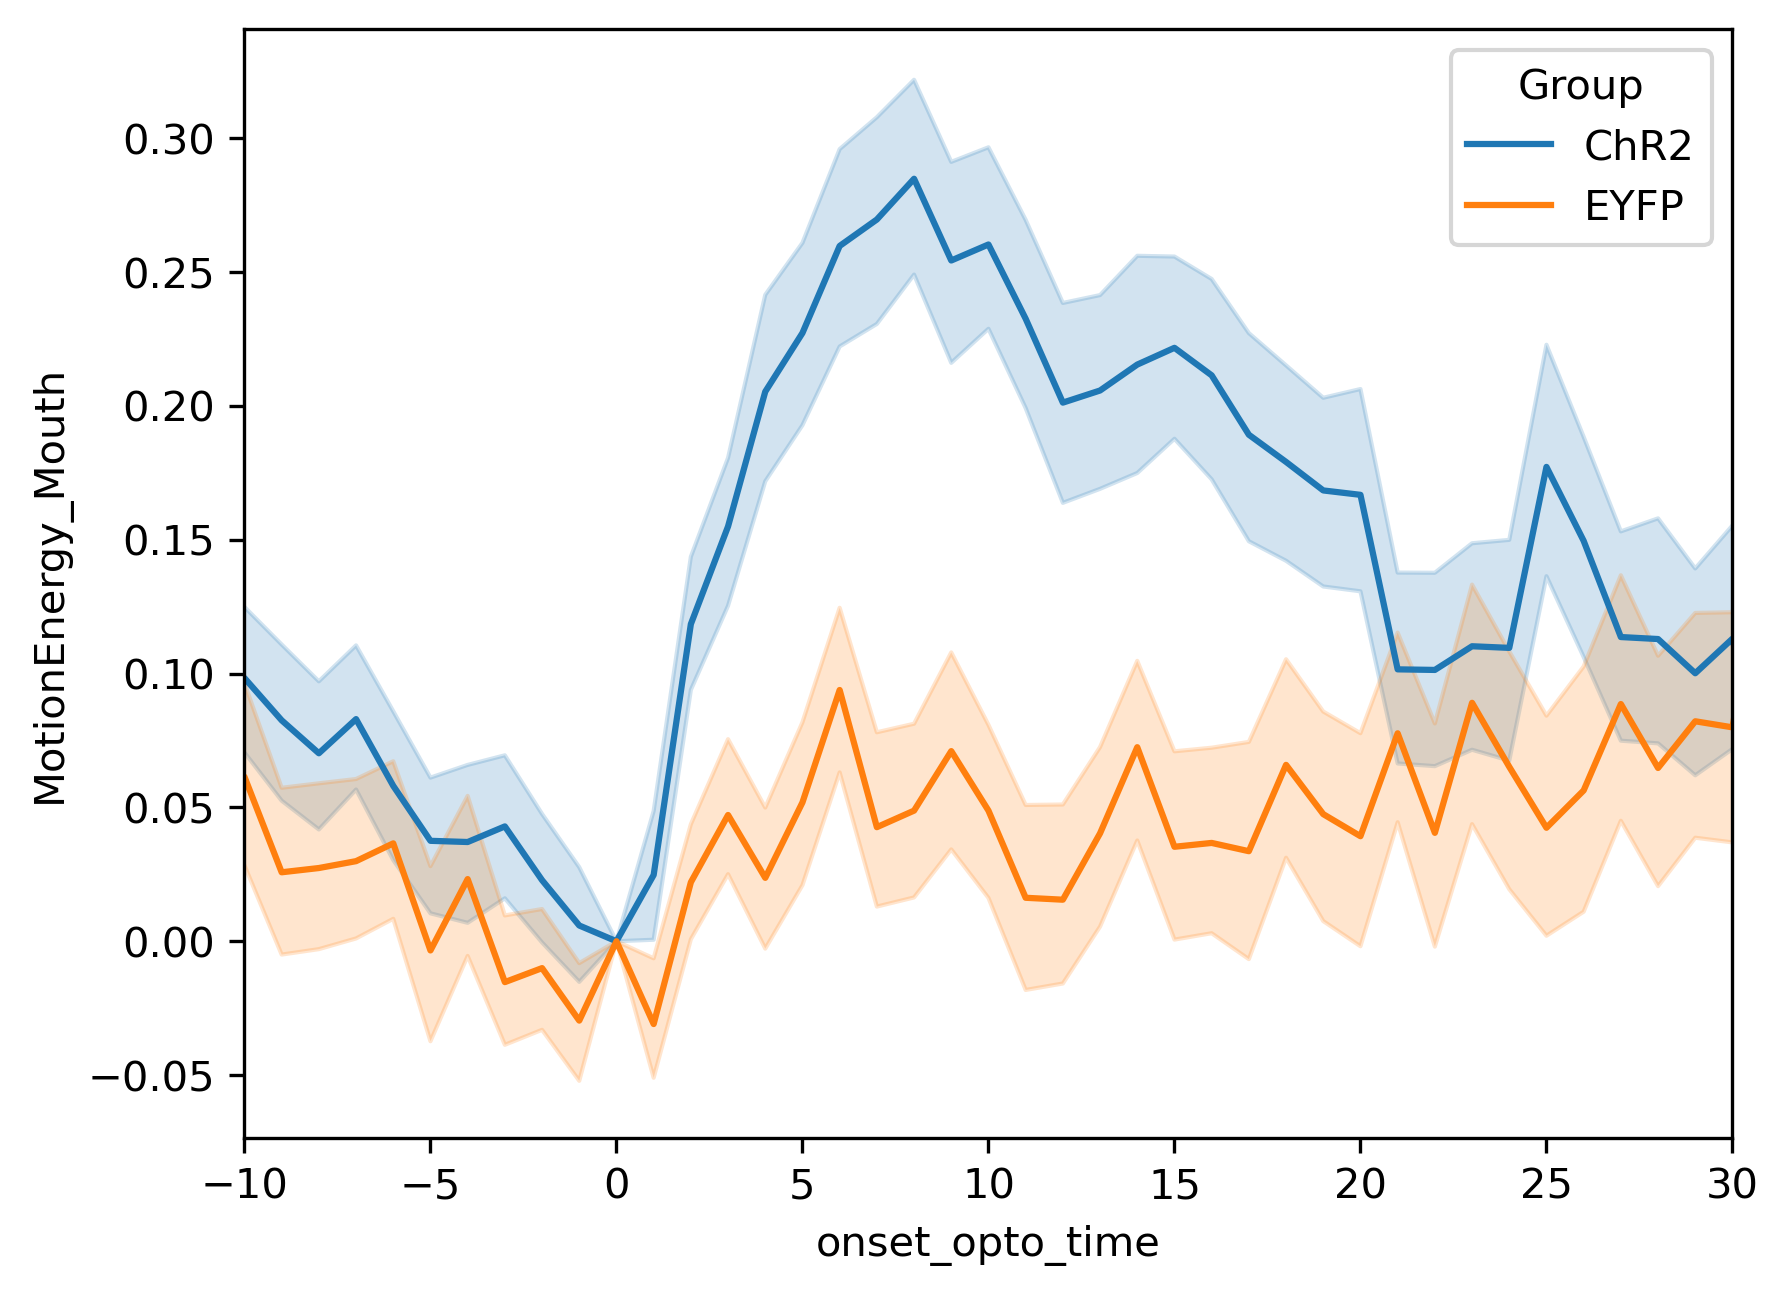

In [7]:
me_mouth_pivot = opto_time_each.pivot_table(index='onset_opto_time', columns=['Group', 'Mouse', 'ExpID', 'onset_opto_epoch'], values='MotionEnergy_Mouth')
me_mouth_pivot_zerosub = (me_mouth_pivot - me_mouth_pivot.loc[0]).reset_index().melt(value_name='MotionEnergy_Mouth', id_vars='onset_opto_time')
sns.lineplot(data=me_mouth_pivot_zerosub, x='onset_opto_time', y='MotionEnergy_Mouth', hue='Group', ci=68)
plt.xlim(-10, 30);

# Fig 2G

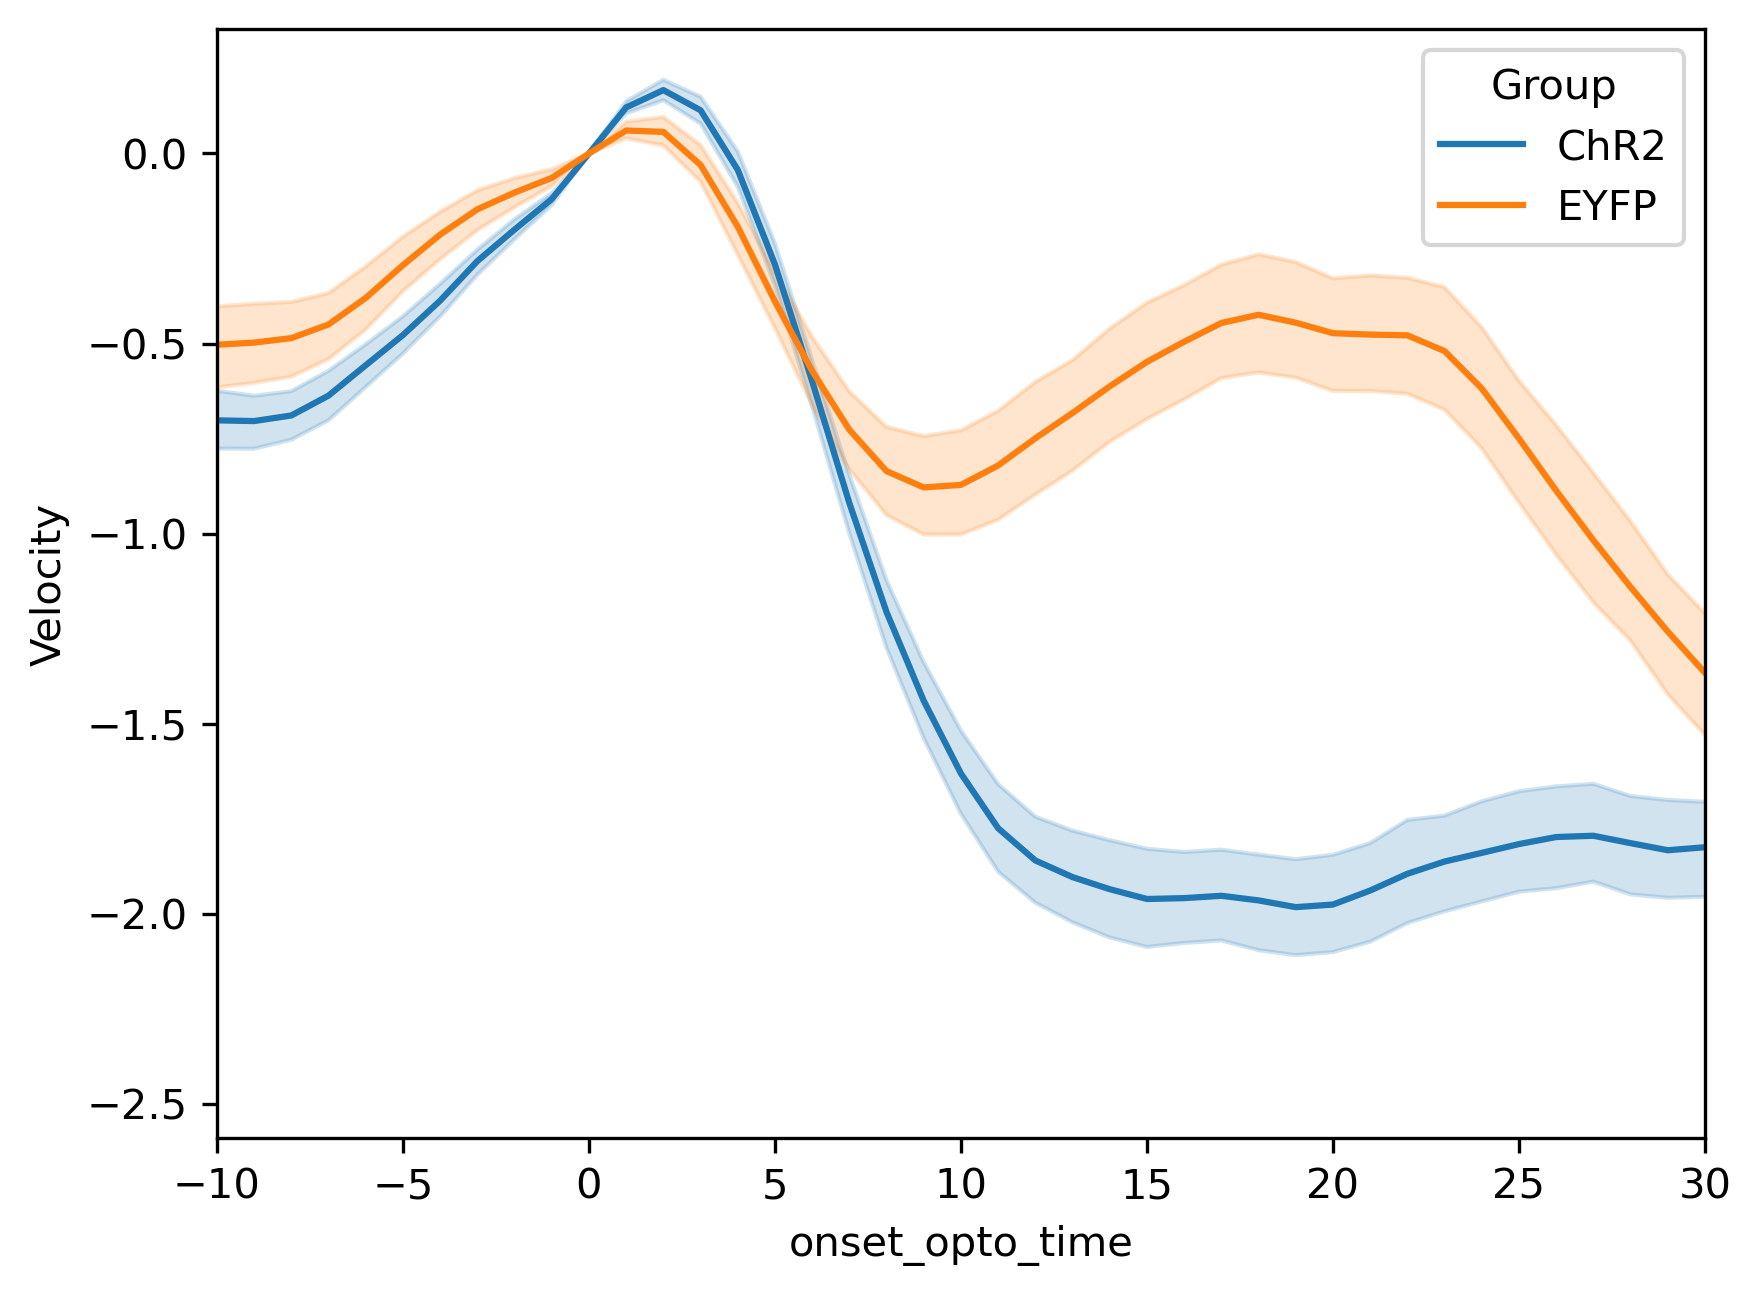

In [8]:
velocity_pivot = opto_time_each.pivot_table(index='onset_opto_time', columns=['Group', 'Mouse', 'ExpID', 'onset_opto_epoch'], values='Velocity')
velocity_pivot_zerosub = (velocity_pivot - velocity_pivot.loc[0]).reset_index().melt(value_name='Velocity', id_vars='onset_opto_time')
sns.lineplot(data=velocity_pivot_zerosub, x='onset_opto_time', y='Velocity', ci=68, hue='Group')
plt.xlim(-10, 30);

# Fig 2F

In [9]:
behaviour['onset_opto_prepost'] = np.nan
behaviour.loc[(behaviour.onset_opto_time>-5)&(behaviour.onset_opto_time<0), 'onset_opto_prepost'] = 'pre'
behaviour.loc[(behaviour.onset_opto_time>10)&(behaviour.onset_opto_time<20), 'onset_opto_prepost'] = 'post'
opto_prepost = behaviour.loc[behaviour.ExpID.isin(opto_trials)].groupby(['Mouse', 'Group', 'Sex', 'onset_opto_prepost']).mean().reset_index()


<AxesSubplot:xlabel='onset_opto_prepost', ylabel='MotionEnergy_Mouth'>

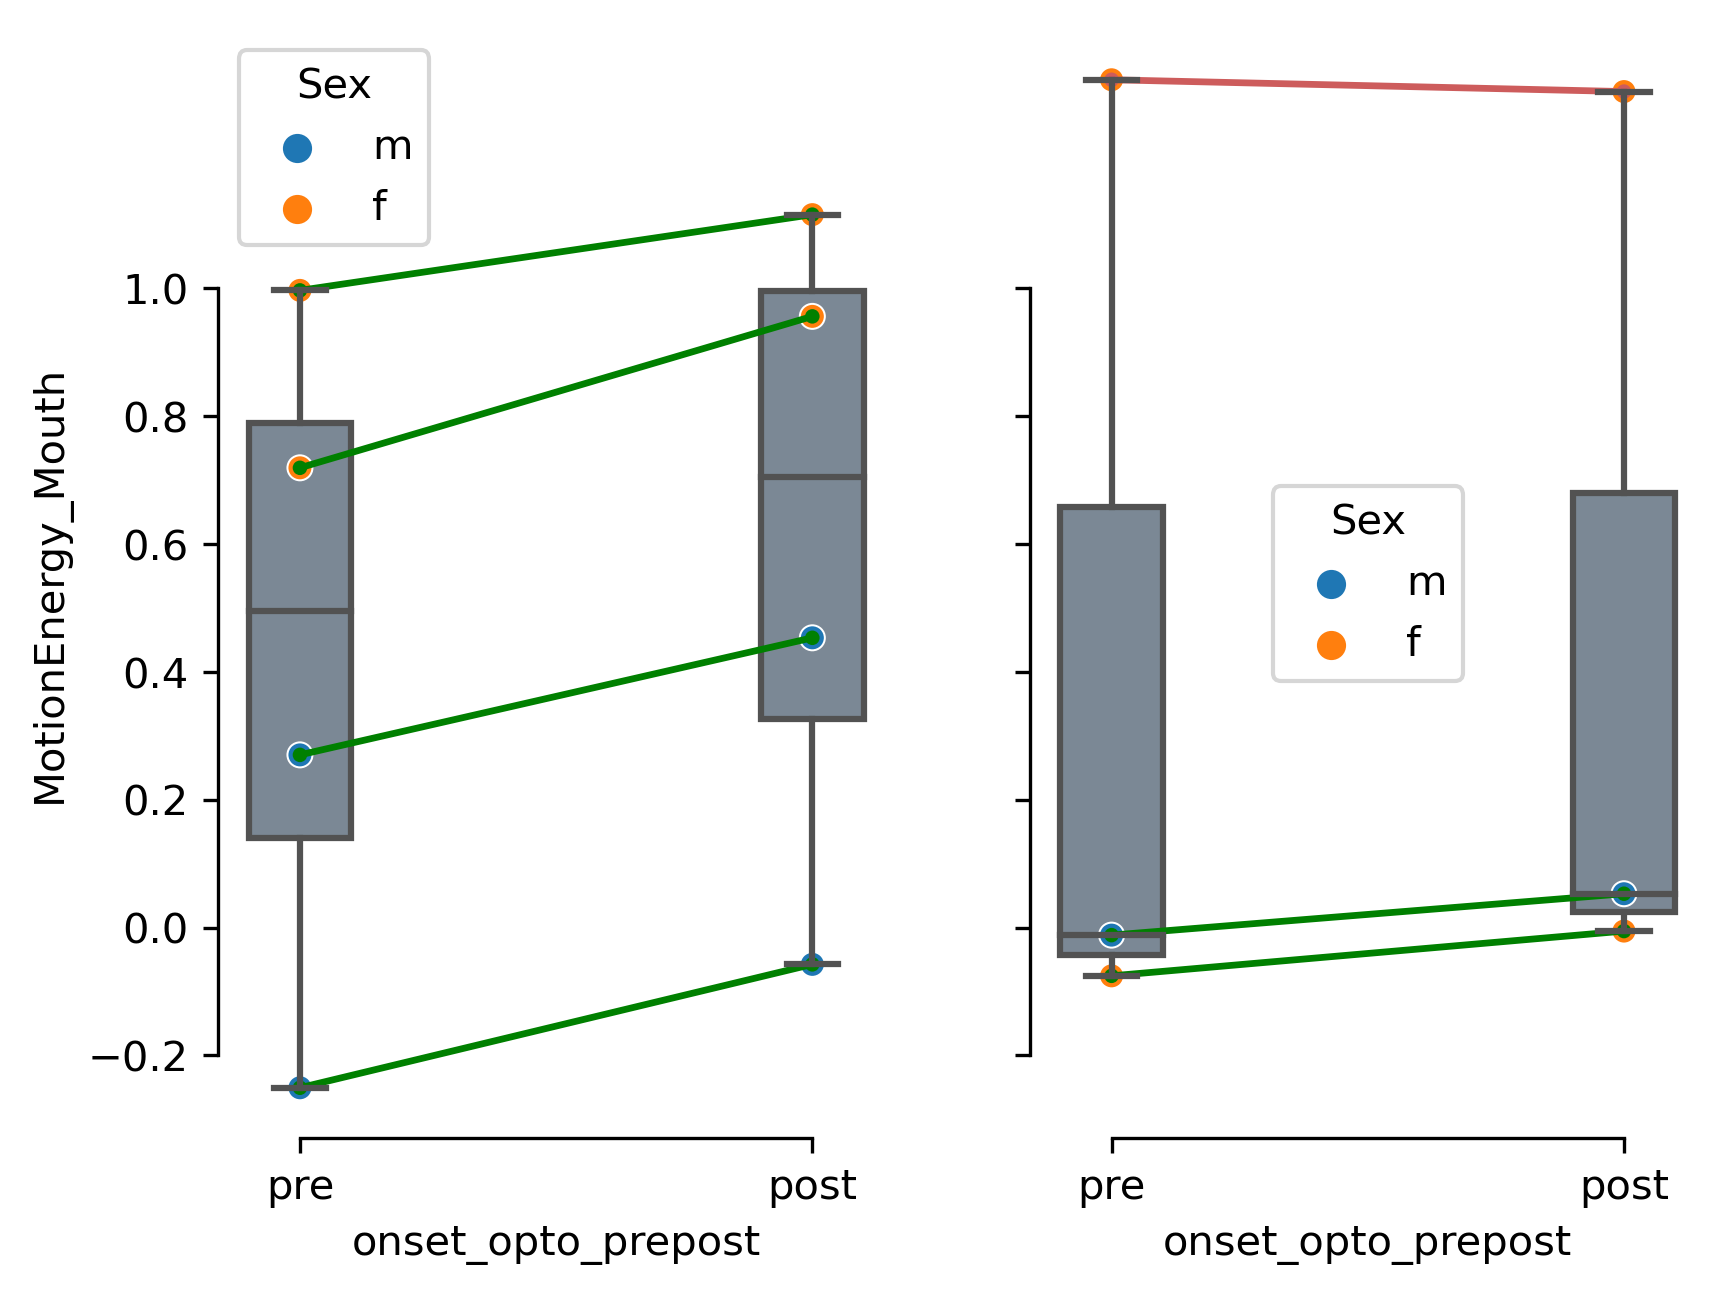

In [10]:
fig, axs = plt.subplots(1,2, sharey=True)
pg.plot_paired(data=opto_prepost.loc[opto_prepost.Group=='ChR2'], within='onset_opto_prepost', dv='MotionEnergy_Mouth', 
    subject='Mouse', ax=axs[0], order=['pre', 'post'])
pg.plot_paired(data=opto_prepost.loc[opto_prepost.Group=='EYFP'], within='onset_opto_prepost', dv='MotionEnergy_Mouth', 
    subject='Mouse', ax=axs[1], order=['pre', 'post'])

sns.scatterplot(data=opto_prepost.loc[opto_prepost.Group=='ChR2'].sort_values(by="onset_opto_prepost", ascending=False),
     ax=axs[0], x='onset_opto_prepost', y='MotionEnergy_Mouth', estimator=None, units='Mouse', hue='Sex')

sns.scatterplot(data=opto_prepost.loc[opto_prepost.Group=='EYFP'].sort_values(by="onset_opto_prepost", ascending=False),
     ax=axs[1], x='onset_opto_prepost', y='MotionEnergy_Mouth', estimator=None, units='Mouse', hue='Sex')

In [11]:
pg.mixed_anova(data=opto_prepost, within='onset_opto_prepost', dv='MotionEnergy_Mouth', 
                  between='Group', subject='Mouse', correction='auto')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.029646,1,5,0.029646,0.036255,0.856480,0.007199,NaN
1,onset_opto_prepost,0.051377,1,5,0.051377,42.467425,0.001272,0.894665,1.0
2,Interaction,0.017813,1,5,0.017813,14.723676,0.012159,0.746498,NaN


In [12]:
opto_prepost.MotionEnergy_Mouth = opto_prepost.MotionEnergy_Mouth.astype(float)
pg.pairwise_tests(data=opto_prepost, within='onset_opto_prepost', dv='MotionEnergy_Mouth', 
                  between='Group', padjust='bonf', within_first=False, subject='Mouse')

,Contrast,Group,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Group,-,ChR2,EYFP,False,True,0.179492,3.436114,two-sided,0.867626,NaN,NaN,0.55,0.122463
1,onset_opto_prepost,-,post,pre,True,True,3.594261,6.000000,two-sided,0.011445,NaN,NaN,6.051,0.193058
2,Group * onset_opto_prepost,ChR2,post,pre,True,True,7.484872,3.000000,two-sided,0.004940,0.009879,bonf,11.236,0.295445
3,Group * onset_opto_prepost,EYFP,post,pre,True,True,1.353009,2.000000,two-sided,0.308702,0.617404,bonf,0.804,0.040433


In [13]:
pg.mixed_anova(data=opto_prepost, within='onset_opto_prepost', dv='MotionEnergy_Mouth', 
                  between='Sex', subject='Mouse', correction=True)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Sex,1.760864,1,5,1.760864,3.734861,0.111122,0.427581,NaN
1,onset_opto_prepost,0.051377,1,5,0.051377,11.619854,0.019068,0.699155,1.0
2,Interaction,0.001754,1,5,0.001754,0.396753,0.556430,0.073517,NaN


# Fig 2H

In [14]:
behaviour['onset_opto_prepost'] = np.nan
behaviour.loc[(behaviour.onset_opto_time>-10)&(behaviour.onset_opto_time<20), 'onset_opto_prepost'] = 'pre'
behaviour.loc[(behaviour.onset_opto_time>20)&(behaviour.onset_opto_time<30), 'onset_opto_prepost'] = 'post'
opto_prepost = behaviour.loc[behaviour.ExpID.isin(opto_trials)].groupby(['Mouse', 'Group', 'Sex', 'onset_opto_prepost']).mean().reset_index()

<AxesSubplot:xlabel='onset_opto_prepost', ylabel='Velocity'>

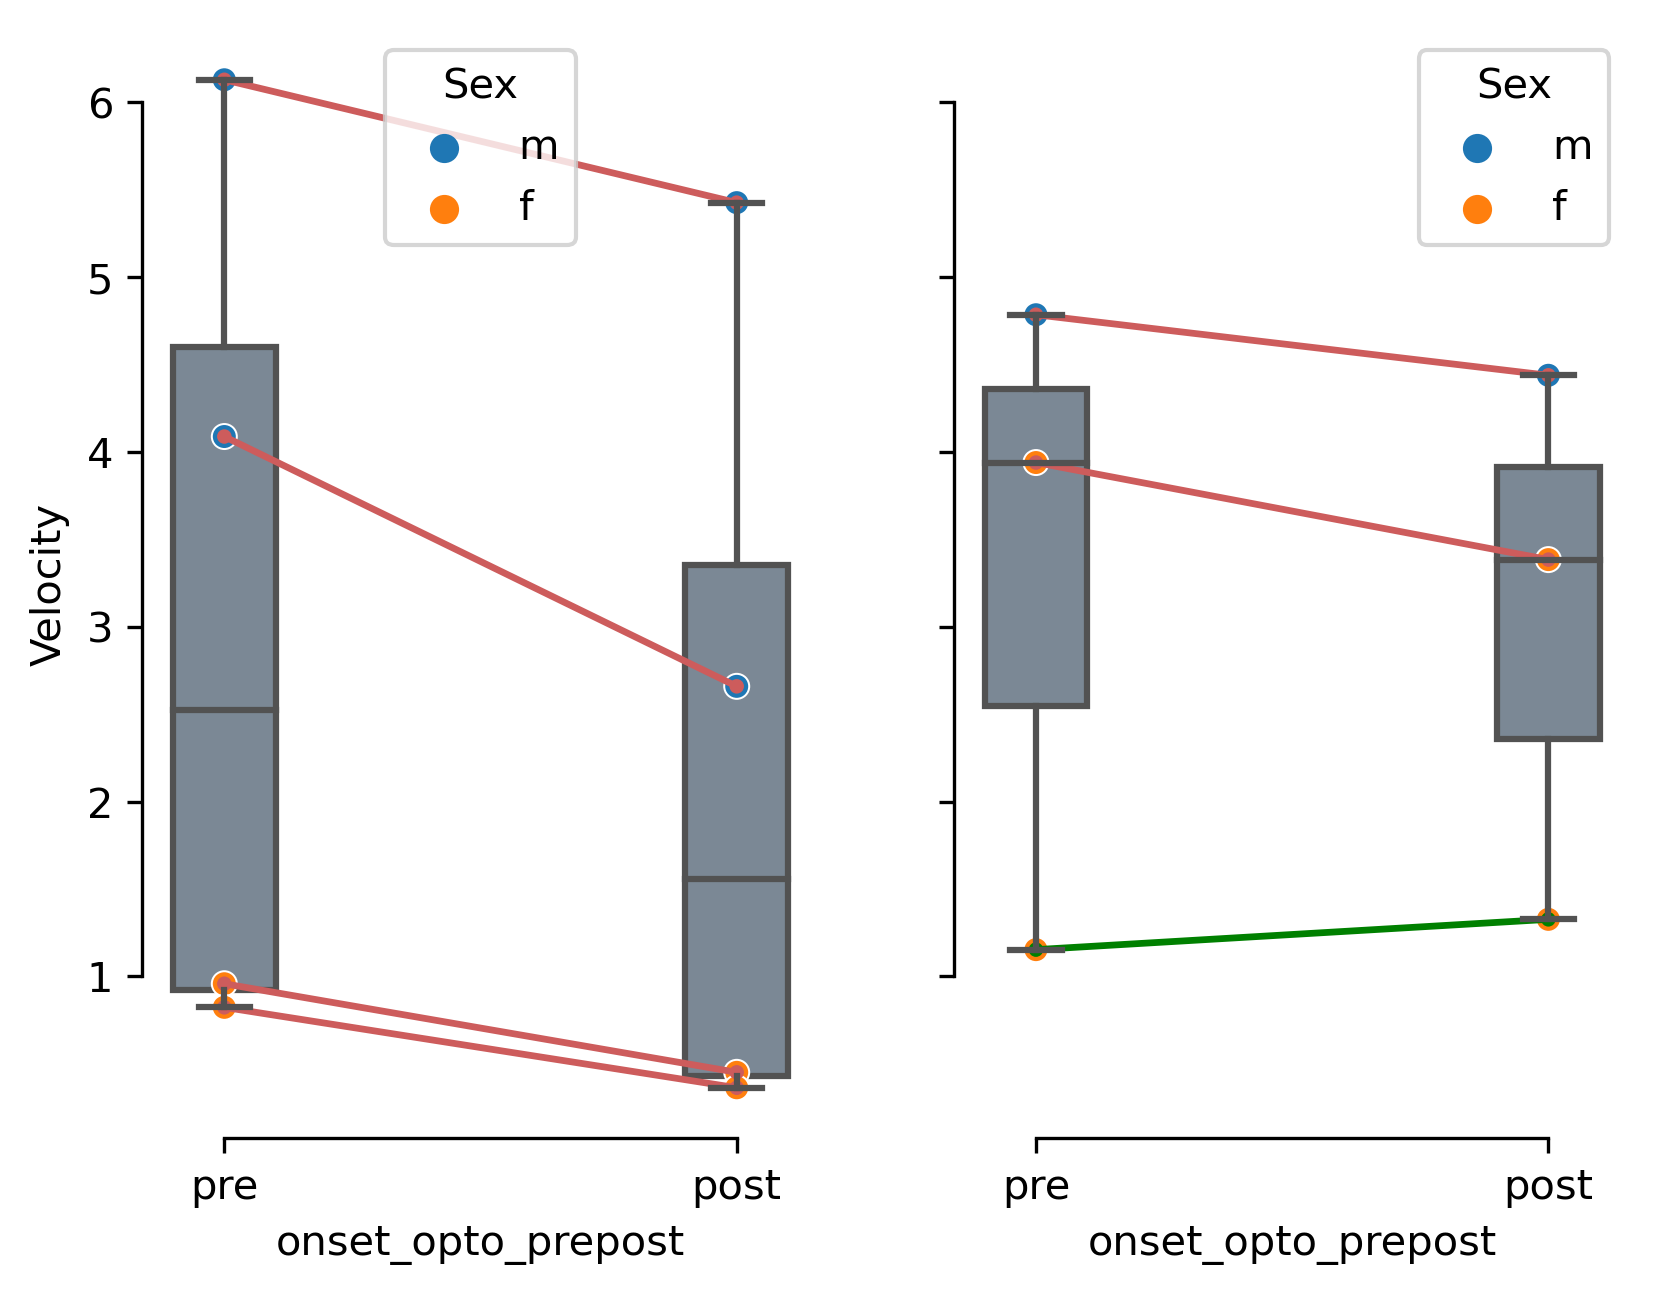

In [15]:
fig, axs = plt.subplots(1,2, sharey=True)
pg.plot_paired(data=opto_prepost.loc[opto_prepost.Group=='ChR2'], within='onset_opto_prepost', dv='Velocity', 
    subject='Mouse', ax=axs[0], order=['pre', 'post'])
pg.plot_paired(data=opto_prepost.loc[opto_prepost.Group=='EYFP'], within='onset_opto_prepost', dv='Velocity', 
    subject='Mouse', ax=axs[1], order=['pre', 'post'])

sns.scatterplot(data=opto_prepost.loc[opto_prepost.Group=='ChR2'].sort_values(by="onset_opto_prepost", ascending=False),
     ax=axs[0], x='onset_opto_prepost', y='Velocity', estimator=None, units='Mouse', hue='Sex')

sns.scatterplot(data=opto_prepost.loc[opto_prepost.Group=='EYFP'].sort_values(by="onset_opto_prepost", ascending=False),
     ax=axs[1], x='onset_opto_prepost', y='Velocity', estimator=None, units='Mouse', hue='Sex')

In [16]:
pg.mixed_anova(data=opto_prepost, within='onset_opto_prepost', dv='Velocity', 
                  between='Group', subject='Mouse', correction=True)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,1.071488,1,5,1.071488,0.109892,0.753710,0.021506,NaN
1,onset_opto_prepost,1.046841,1,5,1.046841,11.815730,0.018487,0.702659,1.0
2,Interaction,0.242634,1,5,0.242634,2.738621,0.158854,0.353890,NaN


In [17]:
pg.pairwise_tests(data=opto_prepost, within='onset_opto_prepost', dv='Velocity', 
                  between='Group', within_first=False, subject='Mouse')

,Contrast,Group,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Group,-,ChR2,EYFP,False,True,-0.351081,4.999888,two-sided,0.739837,0.565,-0.213210
1,onset_opto_prepost,-,post,pre,True,True,-3.026733,6.000000,two-sided,0.023195,3.527,-0.249556
2,Group * onset_opto_prepost,ChR2,post,pre,True,True,-3.452971,3.000000,two-sided,0.040848,2.732,-0.271519
3,Group * onset_opto_prepost,EYFP,post,pre,True,True,-1.121084,2.000000,two-sided,0.378787,0.706,-0.111070


# Fig 2D

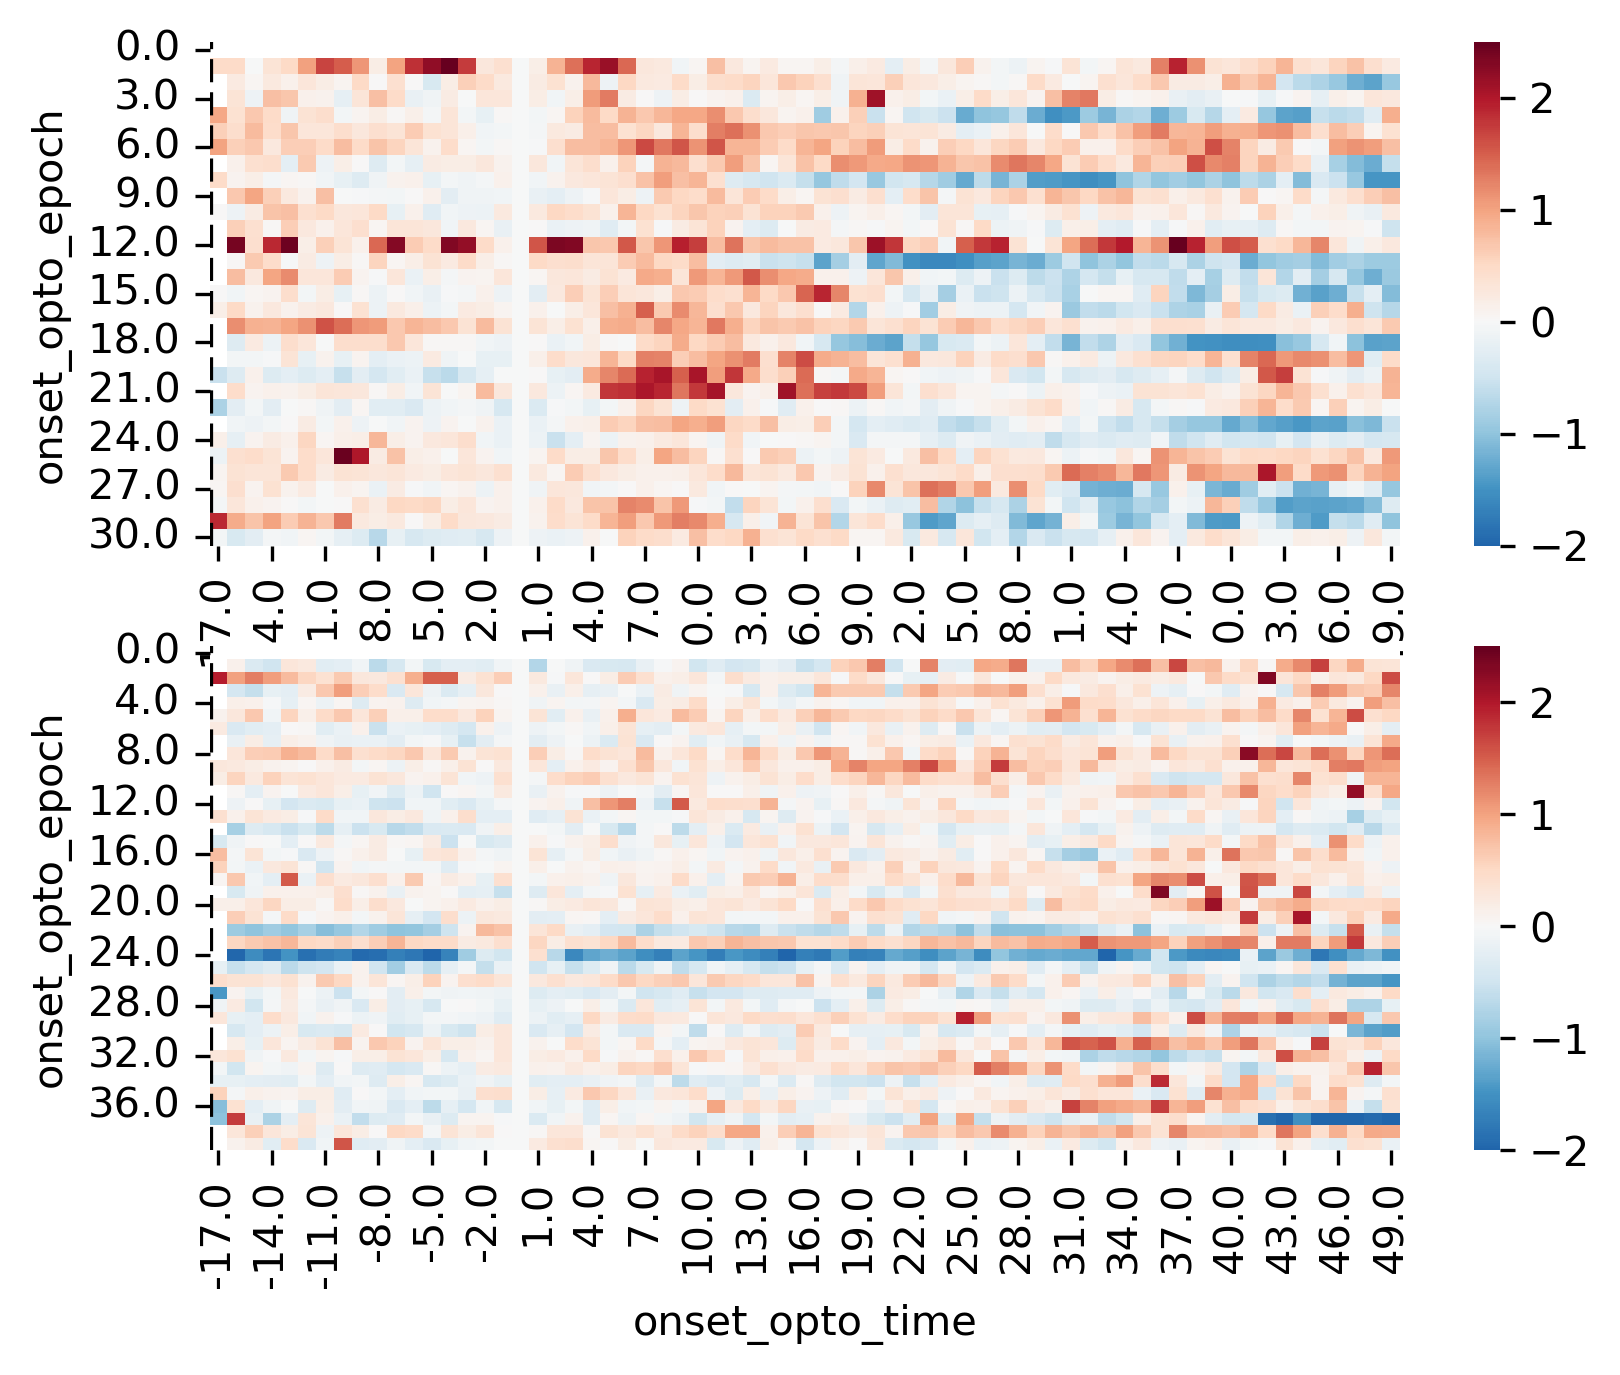

In [18]:
fig, axs = plt.subplots(2,1)

me_mouth_pivot202 = opto_time_each.loc[opto_time_each.ExpID==202].pivot_table(index='onset_opto_time', columns='onset_opto_epoch', values='MotionEnergy_Mouth')#'OFmag_Mouth')
me_mouth_pivot202_zerosub = (me_mouth_pivot202 - me_mouth_pivot202.loc[0])#.reset_index()#.melt(value_name='OFmag_Mouth', id_vars='onset_opto_time')
sns.heatmap(data=me_mouth_pivot202_zerosub.T, cmap='RdBu_r', center=0, ax=axs[0], vmin=-2, vmax=2.5)
axs[0].axvline(x=0, ls='--', c='k')

me_mouth_pivot205 = opto_time_each.loc[opto_time_each.ExpID==205].pivot_table(index='onset_opto_time', columns='onset_opto_epoch', values='MotionEnergy_Mouth')#'OFmag_Mouth')
me_mouth_pivot205_zerosub = (me_mouth_pivot205 - me_mouth_pivot205.loc[0])
sns.heatmap(data=me_mouth_pivot205_zerosub.T, cmap='RdBu_r', center=0, ax=axs[1], vmin=-2, vmax=2.5)
axs[1].axvline(x=0, ls='--', c='k')

# Fig S2G

In [19]:
# opto4, optolearning1, optolearning2

behaviour['PositionBin'] = pd.cut(behaviour.Position, 45, labels=False)
behaviour.loc[(behaviour.Mouse=='41')&(behaviour.Trial=='opto8'), 'Trial'] = 'opto4'
PosBin_optolearning0 = behaviour.loc[behaviour.Trial.str.contains('opto4')].groupby(['PositionBin', 'Group', 'Sex', 'Mouse', 'Trial']).mean().reset_index()
PosBin_optolearning1 = behaviour.loc[behaviour.Trial.str.contains('optolearning1')].groupby(['PositionBin', 'Group', 'Sex', 'Mouse', 'Trial']).mean().reset_index()
PosBin_optolearning2 = behaviour.loc[behaviour.Trial.str.contains('optolearning2')].groupby(['PositionBin', 'Group', 'Sex', 'Mouse', 'Trial']).mean().reset_index()

stimzone0 = PosBin_optolearning0.loc[(PosBin_optolearning0.PositionBin<19)&(PosBin_optolearning0.PositionBin>11)].groupby(['Group', 'Mouse', 'Sex']).mean()
prezone0 = PosBin_optolearning0.loc[(PosBin_optolearning0.PositionBin<10)&(PosBin_optolearning0.PositionBin>5)].groupby(['Group', 'Mouse', 'Sex']).mean()
deltastim0 = (stimzone0 - prezone0).reset_index()

stimzone1 = PosBin_optolearning1.loc[(PosBin_optolearning1.PositionBin<19)&(PosBin_optolearning1.PositionBin>11)].groupby(['Group', 'Mouse', 'Sex']).mean()
prezone1 = PosBin_optolearning1.loc[(PosBin_optolearning1.PositionBin<10)&(PosBin_optolearning1.PositionBin>5)].groupby(['Group', 'Mouse', 'Sex']).mean()
deltastim1 = (stimzone1 - prezone1).reset_index()

stimzone2 = PosBin_optolearning2.loc[(PosBin_optolearning2.PositionBin<19)&(PosBin_optolearning2.PositionBin>11)].groupby(['Group', 'Mouse', 'Sex']).mean()
prezone2 = PosBin_optolearning2.loc[(PosBin_optolearning2.PositionBin<10)&(PosBin_optolearning2.PositionBin>5)].groupby(['Group', 'Mouse', 'Sex']).mean()
deltastim2 = (stimzone2 - prezone2).reset_index()

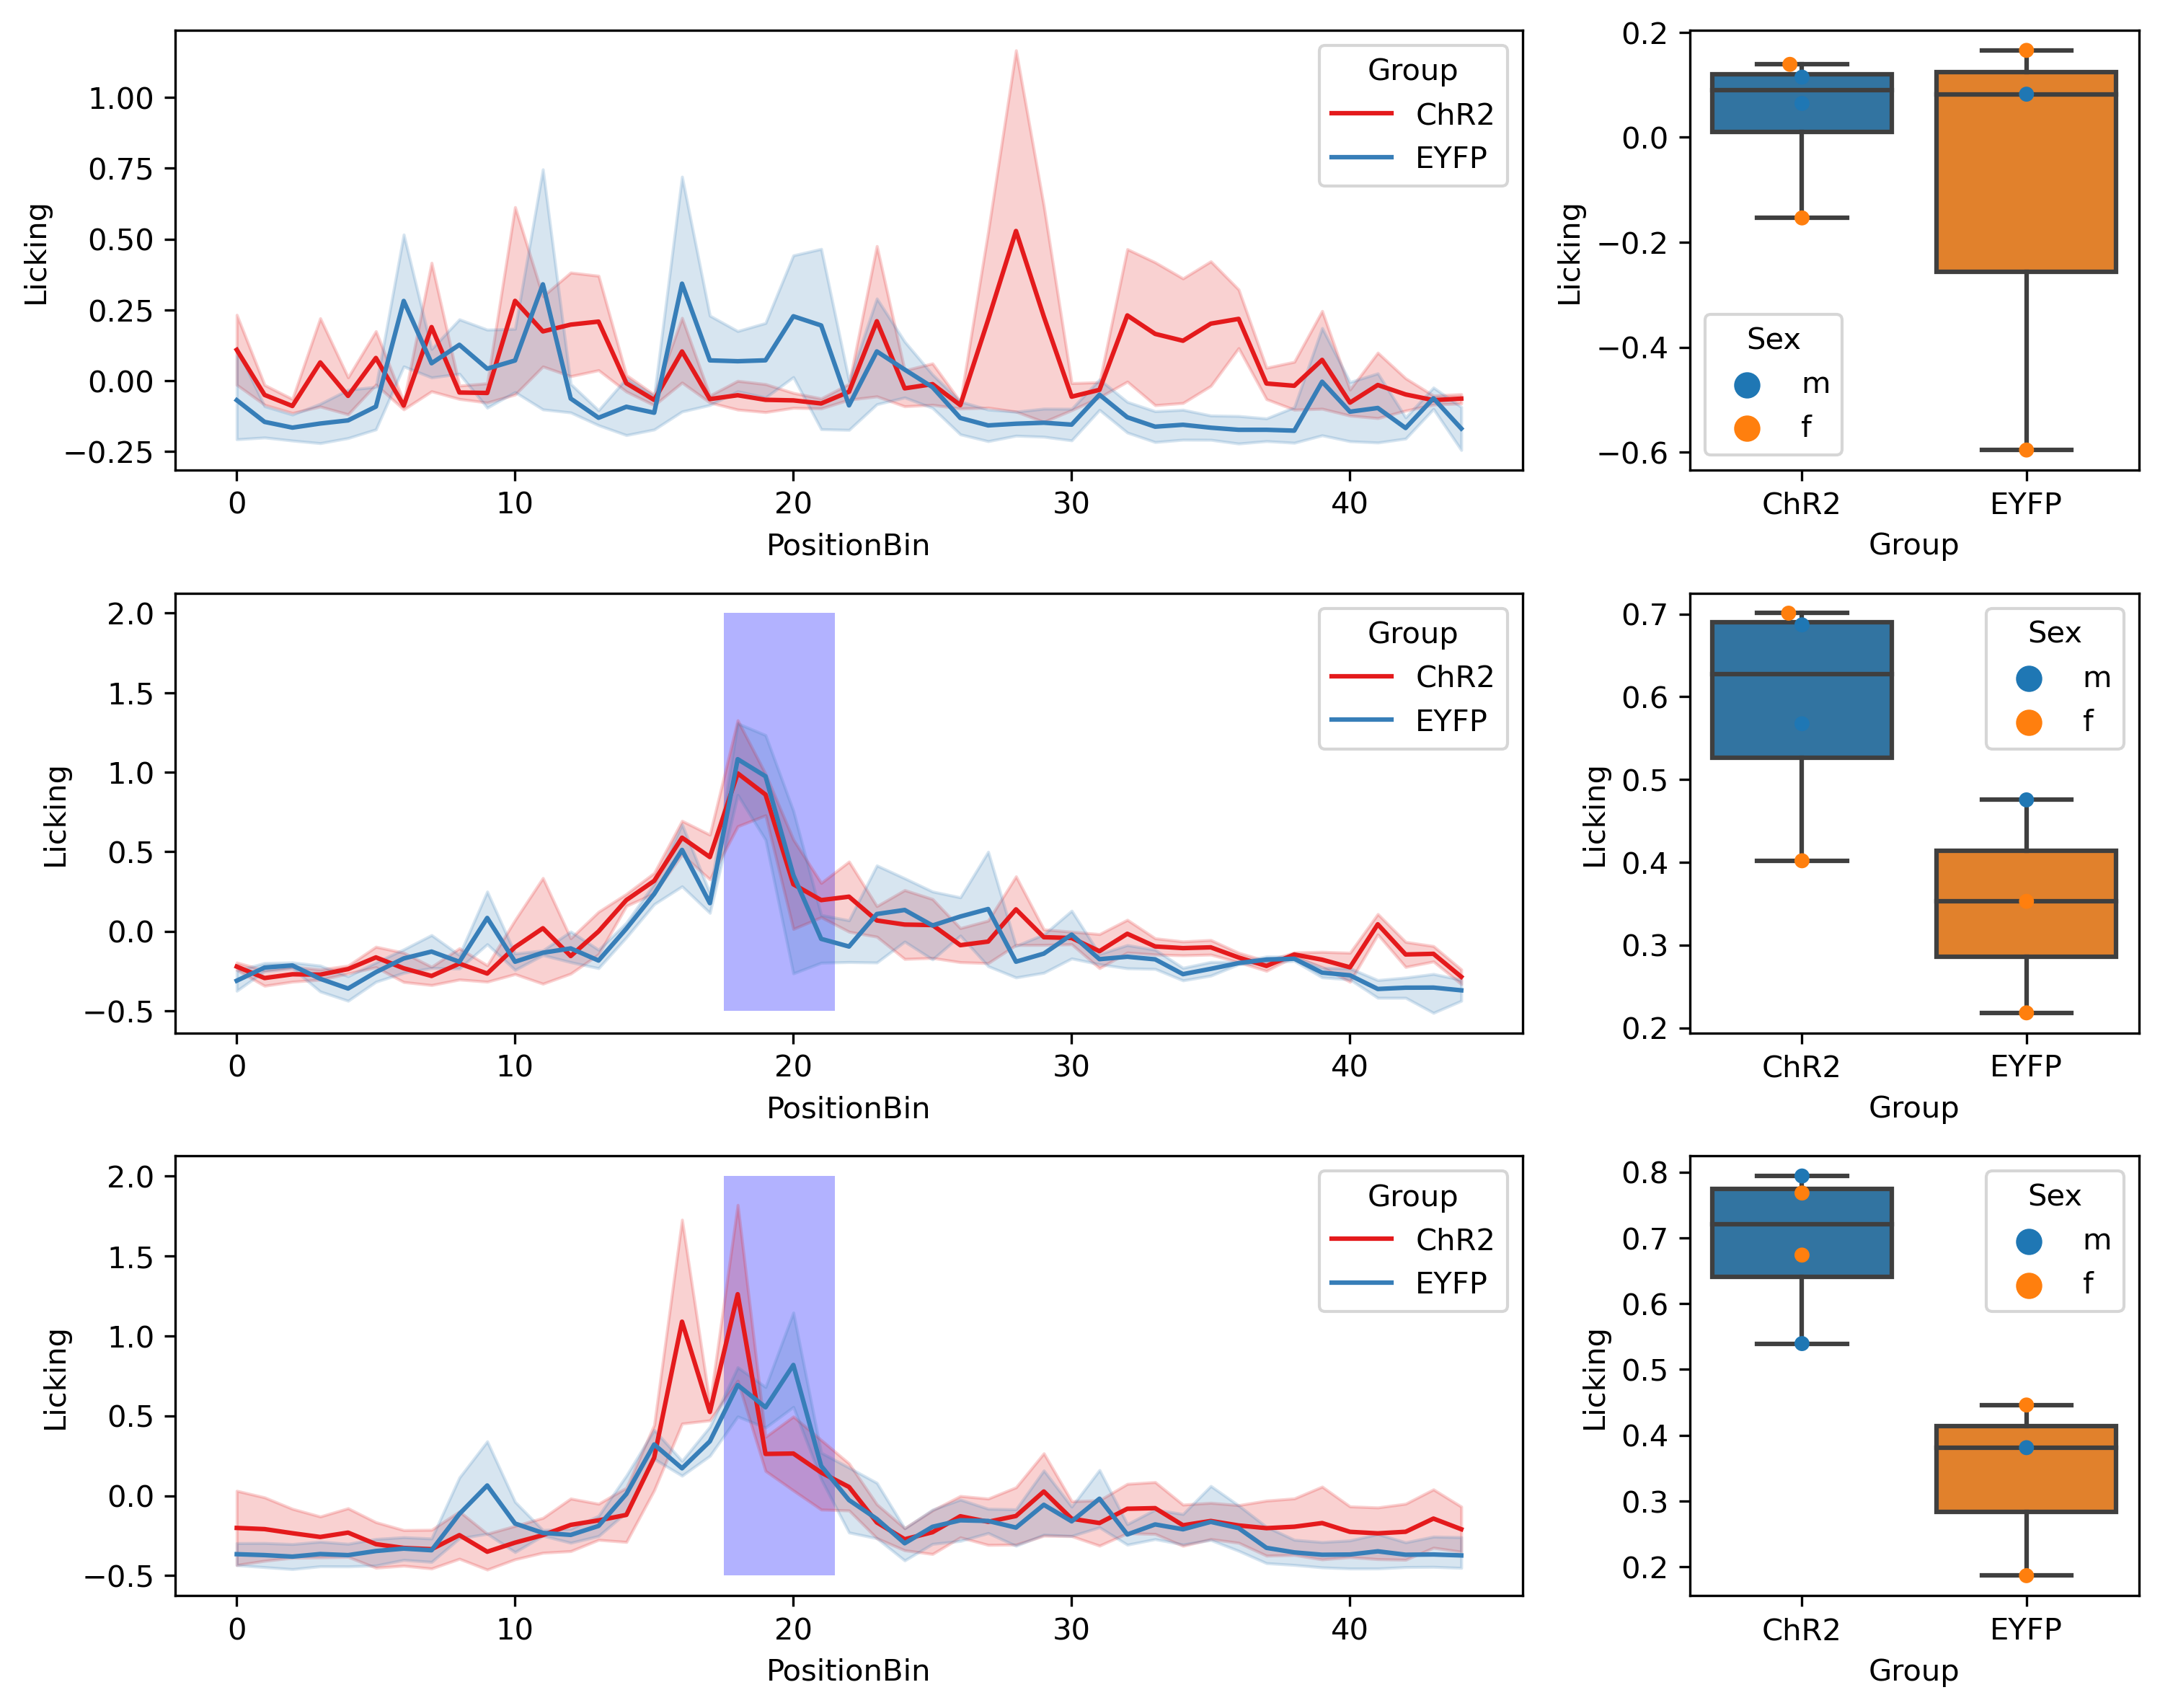

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(10,8), gridspec_kw={'width_ratios': [3, 1]})

for ax in axs[[1,2], 0]:
    ax.add_patch(Rectangle((17.5,-.5),4,2.5,linewidth=0,edgecolor=None,facecolor='blue', alpha=0.3))
sns.lineplot(data=PosBin_optolearning0, x='PositionBin', y='Licking', hue='Group', ci=68, palette='Set1', ax=axs[0, 0])
sns.lineplot(data=PosBin_optolearning1, x='PositionBin', y='Licking', hue='Group', ci=68, palette='Set1', ax=axs[1, 0])
sns.lineplot(data=PosBin_optolearning2, x='PositionBin', y='Licking', hue='Group', ci=68, palette='Set1', ax=axs[2, 0])

sns.boxplot(data=deltastim0, y='Licking', x='Group', ax=axs[0,1])
sns.swarmplot(data=deltastim0, y='Licking', x='Group', hue='Sex', ax=axs[0,1])
sns.boxplot(data=deltastim1, y='Licking', x='Group', ax=axs[1,1])
sns.swarmplot(data=deltastim1, y='Licking', x='Group', hue='Sex', ax=axs[1,1])
sns.boxplot(data=deltastim2, y='Licking', x='Group', ax=axs[2,1])
sns.swarmplot(data=deltastim2, y='Licking', x='Group', hue='Sex', ax=axs[2,1])

fig.tight_layout()

In [21]:
pg.ttest(deltastim0.loc[deltastim0.Group=='ChR2', 'Licking'], deltastim0.loc[deltastim0.Group=='EYFP', 'Licking'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.628002,2.309119,two-sided,0.586499,"[-0.79, 1.11]",0.553917,0.61,0.091657


In [22]:
pg.anova(data=deltastim0, between=['Group', 'Sex'], dv='Licking')

,Source,SS,DF,MS,F,p-unc,np2
0,Group,0.027136,1.0,0.027136,0.243799,0.655364,0.075159
1,Sex,0.052221,1.0,0.052221,0.469162,0.542549,0.135238
2,Group * Sex,0.016061,1.0,0.016061,0.144299,0.729341,0.045892
3,Residual,0.333919,3.0,0.111306,NaN,NaN,NaN


In [23]:
pg.ttest(deltastim1.loc[deltastim1.Group=='ChR2', 'Licking'], deltastim1.loc[deltastim1.Group=='EYFP', 'Licking'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.366821,4.647229,two-sided,0.068095,"[-0.03, 0.51]",1.785058,1.692,0.471718


In [24]:
pg.anova(data=deltastim1, between=['Group', 'Sex'], dv='Licking')

,Source,SS,DF,MS,F,p-unc,np2
0,Group,0.080869,1.0,0.080869,3.978938,0.140040,0.570135
1,Sex,0.024573,1.0,0.024573,1.209033,0.351847,0.287247
2,Group * Sex,0.005224,1.0,0.005224,0.257057,0.647068,0.078923
3,Residual,0.060973,3.0,0.020324,NaN,NaN,NaN


In [25]:
pg.ttest(deltastim2.loc[deltastim2.Group=='ChR2', 'Licking'], deltastim2.loc[deltastim2.Group=='EYFP', 'Licking'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.672071,3.989301,two-sided,0.021452,"[0.09, 0.63]",2.88141,4.075,0.850658


In [26]:
pg.anova(data=deltastim2, between=['Group', 'Sex'], dv='Licking')

,Source,SS,DF,MS,F,p-unc,np2
0,Group,0.212550,1.0,0.212550,9.036332,0.057392,0.750755
1,Sex,0.000074,1.0,0.000074,0.003135,0.958870,0.001044
2,Group * Sex,0.005687,1.0,0.005687,0.241776,0.656656,0.074581
3,Residual,0.070565,3.0,0.023522,NaN,NaN,NaN
